In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [ ]:
import glob
import cv2
import os
import dlib
import numpy as np
import shutil
import random
import matplotlib.pyplot as plot
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Defining function for Face Detection and Extraction using OpenCV

In [ ]:
def extract_faces(input_path,output_path):
  listing = os.listdir(input_path)
  i = 1  
  for intput_filename in listing:
    cap = cv2.VideoCapture(input_path+intput_filename)

    while True:
      ret, frame = cap.read() 
      if ret:
        
        detector = dlib.get_frontal_face_detector()
        face = detector(frame)
        for d in face:
          x= d.left()
          y= d.top()
          w= d.right()
          h= d.bottom()
          x = max(0,x)
          y = max(0,y)
          
          crop_img= frame[y:h,x:w]
          
        cv2.imwrite(output_path+str(i) + '.jpg', crop_img)
        i += 10
        cap.set(1,i)

      else:
        break
      cv2.waitKey(50)
    cap.release() 

In [ ]:
input_path = '/content/drive/MyDrive/Deepfakedetection/Normal/'
output_path = '/content/drive/MyDrive/Deepfakedetection/images/Normal/'
extract_faces(input_path,output_path)

In [ ]:
input_path = '/content/drive/MyDrive/Deepfakedetection/Deepfake/'
output_path = '/content/drive/MyDrive/Deepfakedetection/images/Deepfake/'
extract_faces(input_path,output_path)

In [ ]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'Normal': 
            label = 0
        elif labels == 'Deepfake':
            label = 1 
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(224,224)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462)

def get_classlabel(class_code):
    labels = {0:'Normal', 1:'Deepfake'}
    return labels[class_code]

In [ ]:
Images, Labels = get_images('/content/drive/MyDrive/Deepfakedetection/images/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [ ]:
Labels

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
Images.shape

(2204, 224, 224, 3)

In [ ]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (2204, 224, 224, 3)
Shape of Labels: (2204,)


Plotting Some Images from both classes


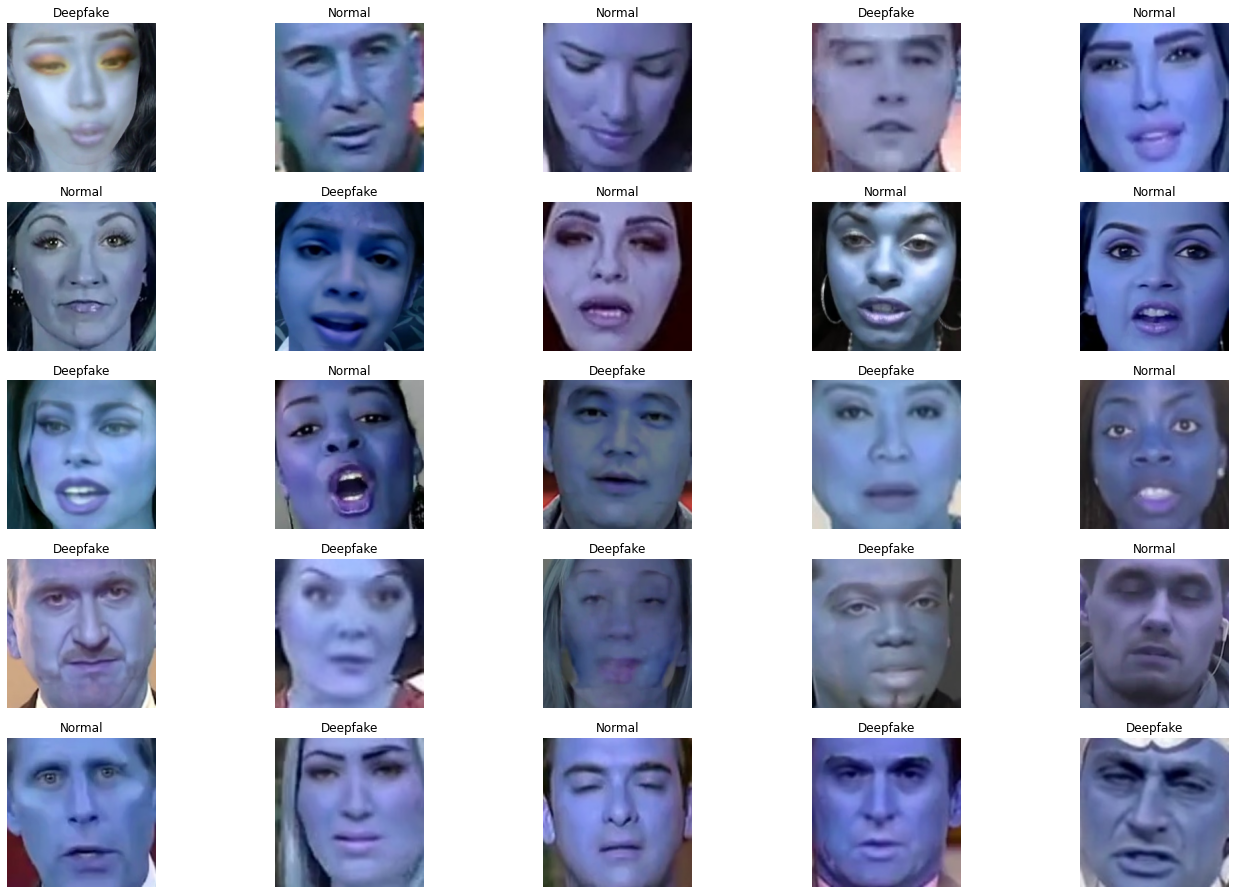

In [ ]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [ ]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 40, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 38, 38, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 36, 50)        4

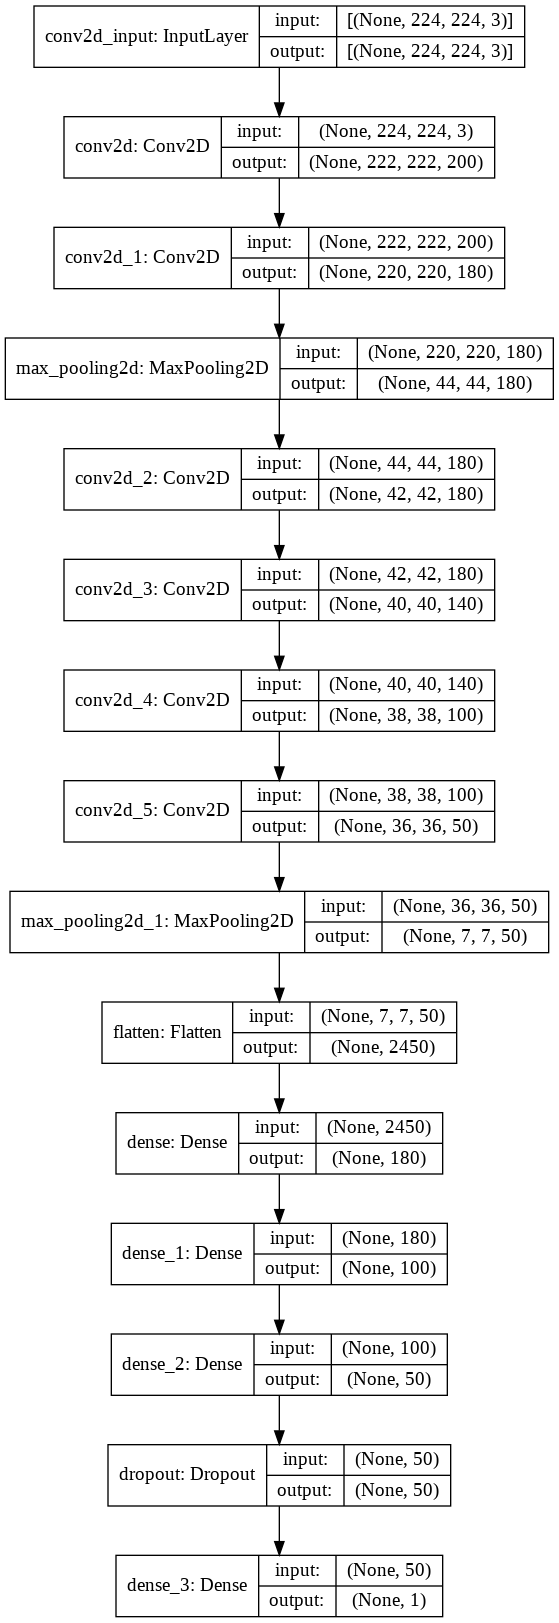

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
trained = model.fit(Images,Labels,epochs=50,validation_split=0.20, verbose=1)

Epoch 1/50
56/56 [==============================] - 85s 805ms/step - loss: 0.9327 - accuracy: 0.5120 - val_loss: 0.7067 - val_accuracy: 0.5170
Epoch 2/50
56/56 [==============================] - 44s 780ms/step - loss: 0.7165 - accuracy: 0.5060 - val_loss: 0.6956 - val_accuracy: 0.4921
Epoch 3/50
56/56 [==============================] - 45s 809ms/step - loss: 0.6889 - accuracy: 0.5436 - val_loss: 0.6846 - val_accuracy: 0.5601
Epoch 4/50
56/56 [==============================] - 45s 796ms/step - loss: 0.6964 - accuracy: 0.5232 - val_loss: 0.7953 - val_accuracy: 0.4853
Epoch 5/50
56/56 [==============================] - 45s 805ms/step - loss: 0.6911 - accuracy: 0.5794 - val_loss: 0.6119 - val_accuracy: 0.6349
Epoch 6/50
56/56 [==============================] - 45s 805ms/step - loss: 0.6054 - accuracy: 0.6584 - val_loss: 0.7694 - val_accuracy: 0.6032
Epoch 7/50
56/56 [==============================] - 45s 809ms/step - loss: 0.5974 - accuracy: 0.6785 - val_loss: 0.4983 - val_accuracy: 0.7460

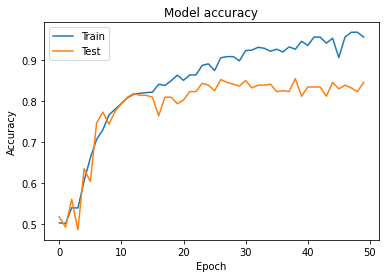

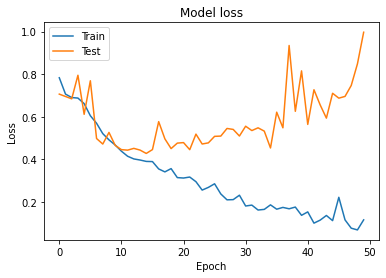

In [ ]:
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [ ]:
model.save('/content/drive/MyDrive/Deepfakedetection/df.h5')

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmp5md0n1nk/assets
